## **Imersão Dados 4ª edição**

*Aluno:* <br>
* Lukas Barbosa Veiga de Melo, 25;
* Engenheiro Ambiental;
* Mestrando em Desenvolvimento e Meio Ambiente, UFPB.
<br>
<br>

**[LinkedIn](www.linkedin.com/in/lukas-veiga-79371b20a
)** <br>
**[GitHub](https://github.com/Lukasveiga)**

## **Dataset: House price data of São Paulo (Adaptado)**

*Variáveis:*

* Rua - Localização da Rua onde a casa pertence;
* Bairro - Localização do Bairro onde a casa pertence
* Cidade - Cidade onde a Casa está localizada;
* Metragem - Área da casa em metros quadrados;
* Quartos - Número de quartos na casa;
* Banheiros - Número de banheiros na casa;
* Vagas - Número de vagas na garagem;
* Valor - Preço da casa que está em moeda brasileira BRL;
<br>

**Fonte(Original):** https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo <br>
**Fonte(Adaptado):** https://gist.github.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891

In [2]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

## Configuracões pandas
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Bibliotecas de Visualização
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Configurações de Visualização
sns.set_style('darkgrid')
sns.set_context('paper', font_scale= 1.2)

# Visualização de dados faltantes
import missingno as msno

In [3]:
# Importação do banco de dados
path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data = pd.read_csv(path)

# Primeiras linhas e formato do banco de dados (shape)
print(data.shape)
data.head(10)

(10008, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


### **1.Sanity Check and Data Filtering**

In [4]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**OBS:** Quando utilizamos a função `.info()` é possível verificar o tipo de dado para cada variável. Quando uma variável retorna o tipo como *objeto* é possível que exista algum erro ou valor faltante principalmente se para essa variável é esperado um tipo inteiro(int) ou flutuante(float), sendo necessário verificar mais a fundo essas variáveis.

In [5]:
# Verificando os dados da variável 'Valor'
data['Valor'].sample(10)

1577     R$ 2.900.000
6073       R$ 370.000
4131     R$ 2.600.000
740      R$ 1.500.000
8849       R$ 630.000
6637     R$ 1.300.000
942        R$ 730.000
3938     R$ 4.500.000
1139       R$ 450.000
662     R$ 26.000.000
Name: Valor, dtype: object

* Observando diferentes amostras da série 'Valor' é possível notar que existe valores referentes a um aluguel diário, mensal ou anual que difere do comportamento esperado de venda.

In [6]:
# Separando os dados da Série 'Valor' com a função split + expand
valor_split = data['Valor'].str.split(expand = True)
valor_split

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [7]:
# Verificando os dados para cada coluna criada com o método split + expand
for i in range(0,3):
    print(valor_split[i].unique())

['R$']
['7.000.000' '3.700.000' '380.000' ... '553.000' '951.000' '2.200']
[None '/Mês' '/Ano' '/Dia']


In [8]:
# Atualizando o dataframe original com os novos valores separados
data[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = data['Valor'].str.split(expand = True)

data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


**OBS:** Como desejamos para esse projeto criar um modelo de regressão que faça a predição dos valores de vendas iremos filtrar os valores de aluguel.

In [9]:
# Novo dataframe com apenas os valores de venda dos imóveis
data_vendas = data[data['Tipo_anuncio'].isnull()]

# Também iremos remover as colunas 'Valor', 'Moeda' e 'Tipo_anuncio'
data_vendas = data_vendas.drop(['Valor', 'Moeda', 'Tipo_anuncio'], axis = 1)

print(data_vendas.shape)
data_vendas.head()

(9156, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [10]:
# Transformando os dados da coluna 'Valor_anuncio' para o formato float
data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')

data_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor_anuncio  9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


/tmp/ipykernel_39641/712752553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_vendas['Valor_anuncio'] = data_vendas['Valor_anuncio'].str.replace('.', '').astype('float')


In [11]:
# Verificando dados faltantes
data_vendas.isnull().sum()

Rua              3049
Bairro             10
Cidade              0
Metragem            0
Quartos             0
Banheiros           0
Vagas               0
Valor_anuncio       0
dtype: int64

<AxesSubplot:>

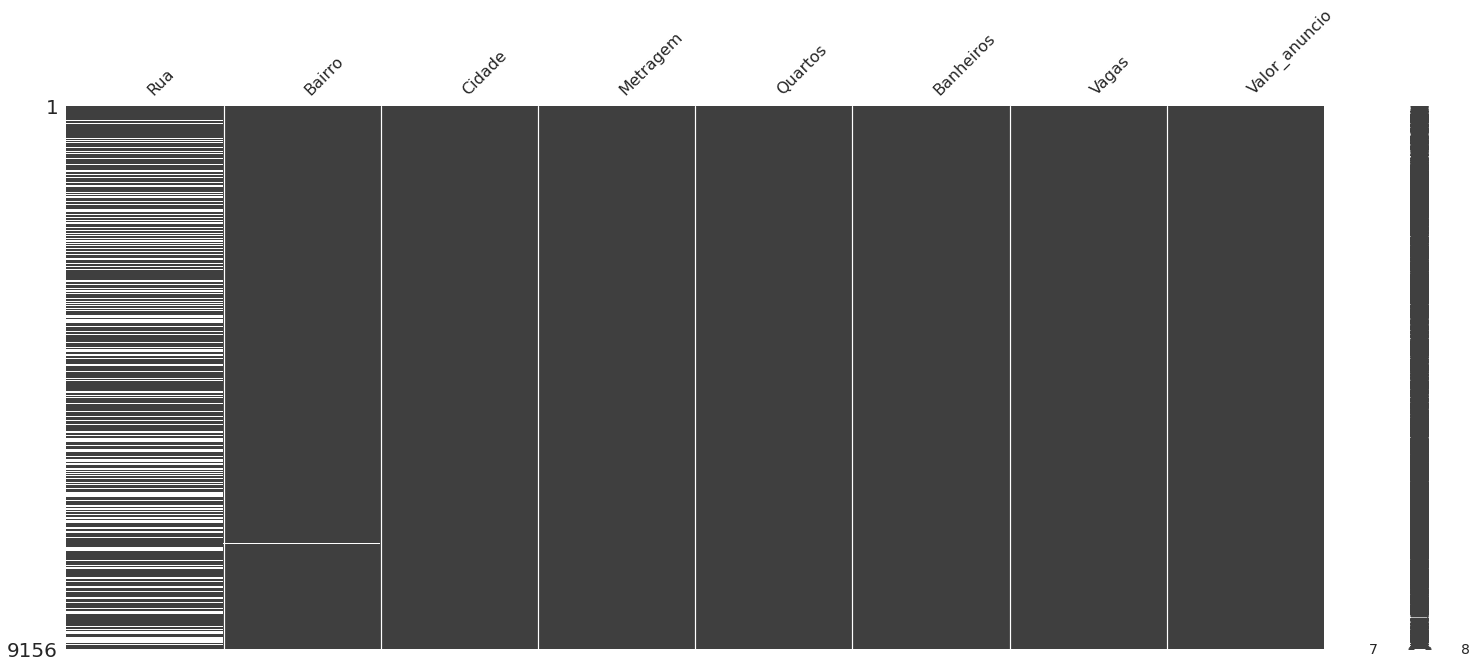

In [12]:
# Matrix msno
msno.matrix(data_vendas)

In [13]:
# Ruas sem o nome do Bairro
data_vendas[data_vendas['Bairro'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,640000.00
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,6895000.00
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,4000000.00
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,3890000.00
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,6895000.00
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,4000000.00
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,1600000.00
9540,"Rua Pacobá, 3773",NaN,São Paulo,1009,5,6,10,6400000.00


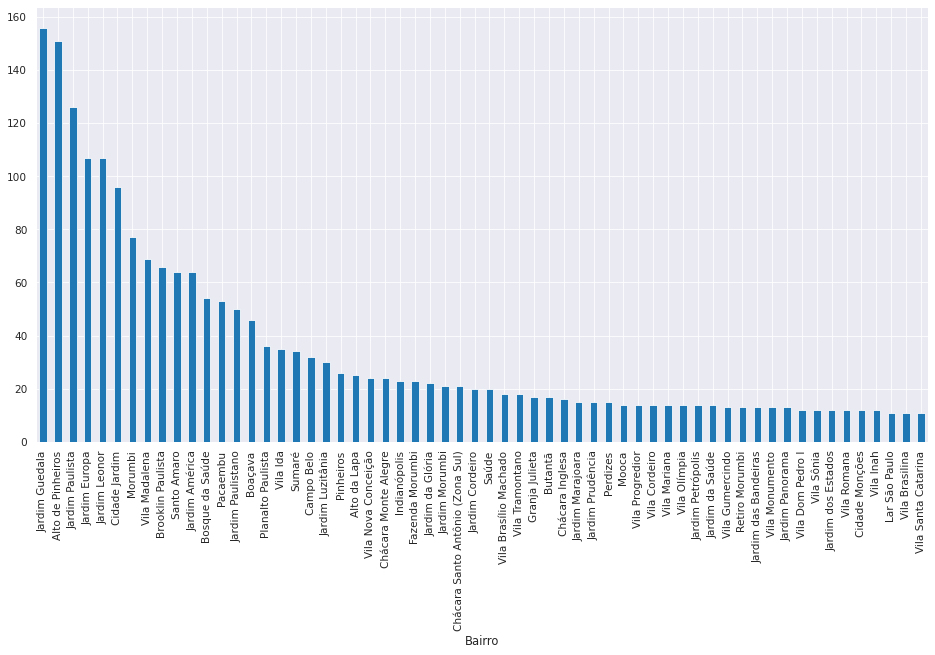

In [14]:
# Bairros sem o nome da rua, 60 maiores valores para melhor visualização
(data_vendas[data_vendas['Rua'].isnull()]
 .value_counts('Bairro')[:60]
 .plot(kind = 'bar', figsize = (16,8)));

### **2.Análise Explanatório dos Dados (EDA)**

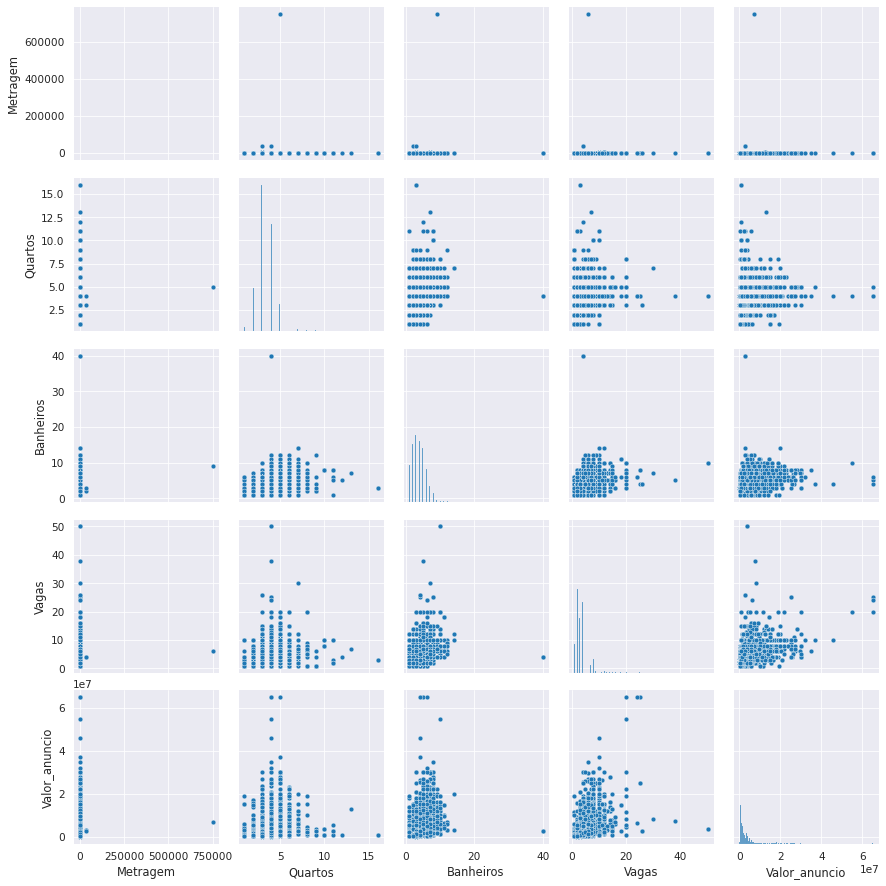

In [15]:
# Inicialmente utilizaremos a funcao 'pairplot' da biblioteca seaborn para visualizar de forma geral correlações entre variáveis e também a distribuição
sns.pairplot(data_vendas)

* A princípio não é possível observar nenhuma correlação positiva ou negativa que sejam relevantes, porém isso pode ser ocasionado pela presença de valores 'outliers' que acabam interferindo negativamente na análise de correlação entre as variáveis.

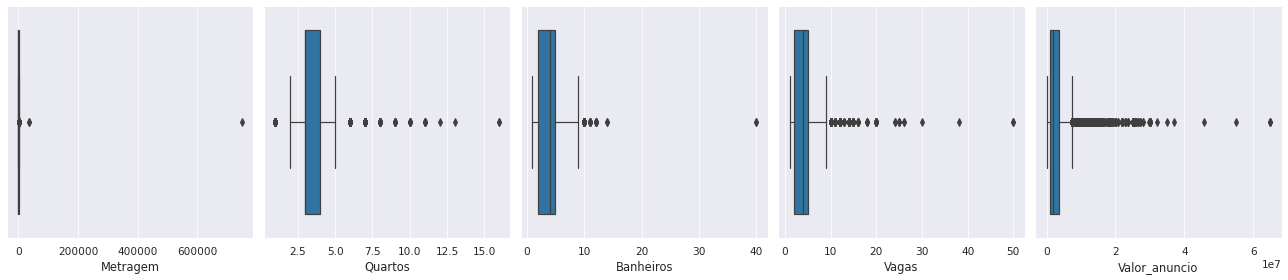

In [16]:
# Analisando os valores outliers
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio']
ncols = len(cols)

fig, axes = plt.subplots(1, ncols, figsize = (18, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas, x = col, ax = ax)

plt.tight_layout()

* Observando os gráficos de boxplot é possível percerber os valores outliers, principalmente na variável 'Metragem'.

In [17]:
# Identificando valores outliers e removendo do dataset (Método Z-Score)
from scipy import stats

z = np.abs(stats.zscore(data_vendas[cols]))
print(z)

       Metragem  Quartos  Banheiros  Vagas  Valor_anuncio
0          0.07     0.53       2.14   0.78           1.00
1          0.01     0.53       0.10   0.02           0.16
2          0.04     0.53       0.41   0.75           0.68
3          0.02     0.43       0.91   0.02           0.60
4          0.04     0.43       0.91   0.75           0.64
...         ...      ...        ...    ...            ...
10002      0.02     0.43       1.12   0.02           0.39
10003      0.04     1.38       0.91   0.75           0.61
10004      0.02     4.34       1.63   0.40           0.19
10005      0.03     0.43       0.41   0.78           0.51
10007      0.04     0.43       0.91   0.75           0.71

[9156 rows x 5 columns]


* **Z-Score:** Nos da uma ideia de quão longe da média o dado está. Tecnicamente falando é a medida de quantos desvios padrão abaixo ou acima da média da populacão o dado está.

In [18]:
# Na maioria dos casos os outliers são indetificados quando o valor de 'z' é maior do que 3, ou seja 3 vezes o valor do desvio padrão.
filtro_zscore = (z < 3).all(axis=1)
data_vendas_filtrado = data_vendas[filtro_zscore]

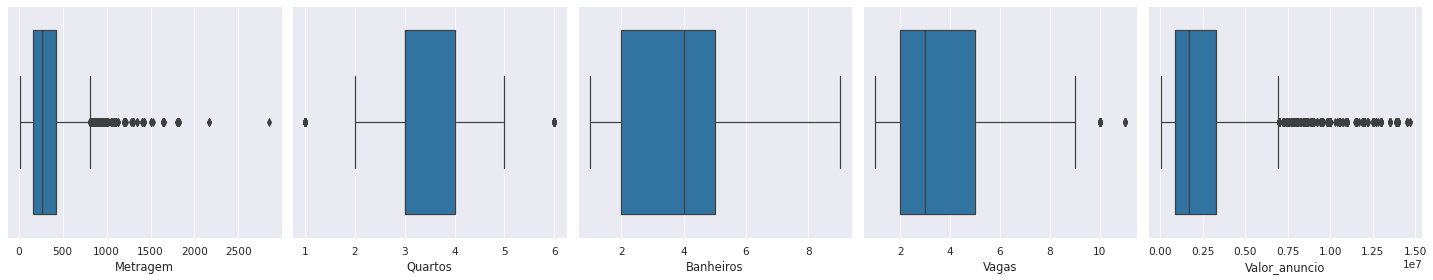

In [19]:
# Visualizando os dados após a remoção dos outliers
fig, axes = plt.subplots(1, ncols, figsize = (20, 4))

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data = data_vendas_filtrado, x = col, ax = ax)

plt.tight_layout()

In [20]:
# A coluna 'Rua' apresenta tanto o nome da rua quanto o número do imóvel, iremos separar esses valores em novas colunas para facilitar em análises futuras
data_vendas_filtrado['apenas_rua'] = data_vendas_filtrado['Rua'].str.extract(r'(^[\w ]+)')  # RegEx
data_vendas_filtrado['apenas_rua'] = data_vendas_filtrado['apenas_rua'].str.lower().str.strip() # Normalizando o formato do nome das ruas
data_vendas_filtrado.head()

/tmp/ipykernel_39641/2629389238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vendas_filtrado['apenas_rua'] = data_vendas_filtrado['Rua'].str.extract(r'(^[\w ]+)')  # RegEx
/tmp/ipykernel_39641/2629389238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vendas_filtrado['apenas_rua'] = data_vendas_filtrado['apenas_rua'].str.lower().str.strip() # Normalizando o formato do nome das ruas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,rua tobias barreto


In [21]:
# Adicionando uma nova coluna ao dataframe para reduzir a escala do valores dos imóveis
data_vendas_filtrado = data_vendas_filtrado.assign(Valor_anuncio_milhoes = lambda x: (x['Valor_anuncio']/1000000))

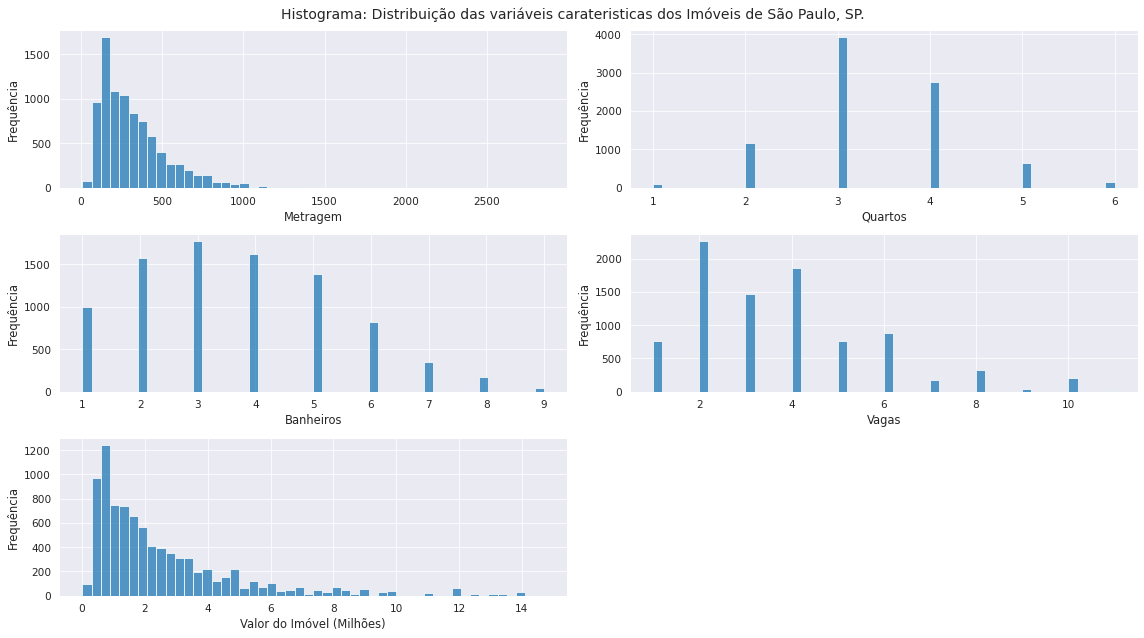

In [22]:
# Visualizando a distribuição de cada variável com os gráficos de histograma
cols = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio_milhoes']

fig, axes = plt.subplots(3, 2, figsize = (16, 9))

for col, ax in zip(cols, axes.flatten()):
    if col != 'Valor_anuncio_milhoes':
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(ylabel = 'Frequência')
    else:
        sns.histplot(data = data_vendas_filtrado, x = col, ax = ax, bins = 50)
        ax.set(xlabel = 'Valor do Imóvel (Milhões)', ylabel = 'Frequência')

fig.suptitle('Histograma: Distribuição das variáveis carateristicas dos Imóveis de São Paulo, SP.', fontsize = 14)
fig.delaxes(axes[2,1])

plt.tight_layout()

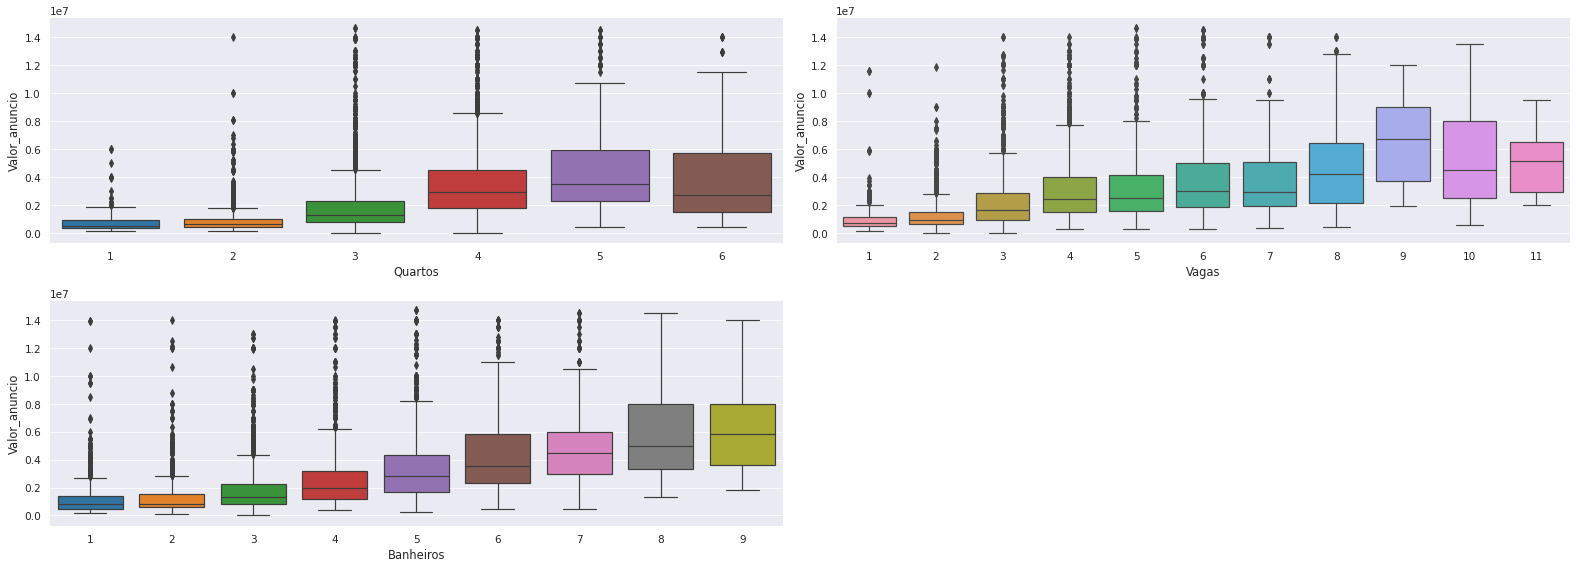

In [23]:
# Visualizando a distribuição das variáveis em relação ao valor dos imóveis
fig, ax = plt.subplots(2,2, figsize = (22,8))

sns.boxplot(data= data_vendas_filtrado, x = 'Quartos',   y = 'Valor_anuncio', ax = ax[0,0])
sns.boxplot(data= data_vendas_filtrado, x = 'Vagas',     y = 'Valor_anuncio', ax = ax[0,1])
sns.boxplot(data= data_vendas_filtrado, x = 'Banheiros', y = 'Valor_anuncio', ax = ax[1,0])

fig.delaxes(ax[1,1])
fig.tight_layout()

In [24]:
# Criando uma nova coluna do valor da metragem para cada imóvel
data_vendas_filtrado = data_vendas_filtrado.assign(valor_m2_imovel = lambda x: (x['Valor_anuncio']/x['Metragem']))
data_vendas_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua,Valor_anuncio_milhoes,valor_m2_imovel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,avenida itacira,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,NaN,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,rua tobias barreto,0.54,5400.00


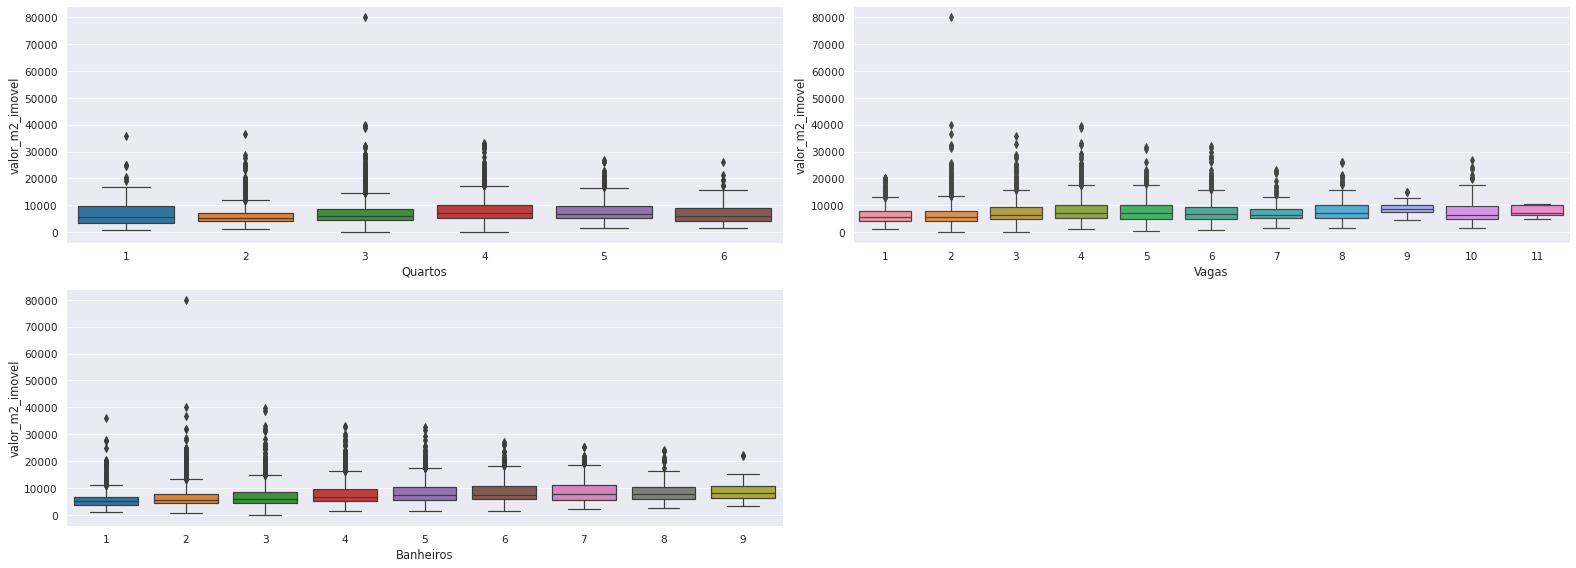

In [25]:
# Visualizando a distribuição das variáveis em relação ao valor da metragem para cada imóvel
fig, ax = plt.subplots(2,2, figsize = (22,8))

sns.boxplot(data= data_vendas_filtrado, x = 'Quartos',   y = 'valor_m2_imovel', ax = ax[0,0])
sns.boxplot(data= data_vendas_filtrado, x = 'Vagas',     y = 'valor_m2_imovel', ax = ax[0,1])
sns.boxplot(data= data_vendas_filtrado, x = 'Banheiros', y = 'valor_m2_imovel', ax = ax[1,0])

fig.delaxes(ax[1,1])
fig.tight_layout()

In [26]:
# Preço do metro quadrado por bairro
metragem_valor = data_vendas_filtrado.groupby('Bairro').sum()
metragem_valor = metragem_valor.assign(valor_m2 = lambda x: (x['Valor_anuncio']/x['Metragem']))
metragem_valor.reset_index(inplace= True)
metragem_valor

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel,valor_m2
0,Aclimação,19447,258,240,230,139292801.00,139.29,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,46796.55,5708.74
2,Alto da Lapa,23075,242,294,296,162653500.00,162.65,599289.38,7048.91
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,113834.80,4385.00
4,Alto de Pinheiros,146621,1344,1652,1609,1582070915.00,1582.07,3846331.04,10790.21
...,...,...,...,...,...,...,...,...,...
686,Vila Água Funda,761,13,11,13,3260000.00,3.26,22335.64,4283.84
687,Água Branca,2083,37,39,27,14718000.00,14.72,87229.37,7065.77
688,Água Fria,1985,34,41,30,11125000.00,11.12,70093.25,5604.53
689,Água Funda,278,6,5,4,1090000.00,1.09,7753.73,3920.86


In [27]:
bairros = list(data_vendas_filtrado['Bairro'].value_counts()[:25].index)
bairros

['Alto de Pinheiros',
 'Jardim Guedala',
 'Brooklin Paulista',
 'Jardim Paulista',
 'Vila Madalena',
 'Pacaembu',
 'Planalto Paulista',
 'Cidade Jardim',
 'Vila Mariana',
 'Jardim Leonor',
 'Santo Amaro',
 'Morumbi',
 'Jardim Europa',
 'Campo Belo',
 'Sumaré',
 'Jardim Paulistano',
 'Bosque da Saúde',
 'Jardim da Glória',
 'Indianópolis',
 'Boaçava',
 'Vila Nova Conceição',
 'Cambuci',
 'Pinheiros',
 'Vila Monumento',
 'Jardim Luzitânia']

In [28]:
fig = px.scatter(metragem_valor.query('Bairro in @bairros'), x = 'Metragem', y = 'Valor_anuncio_milhoes', hover_name = 'Bairro', size = 'valor_m2',
                                    size_max = 60, log_x= True)

fig.show()

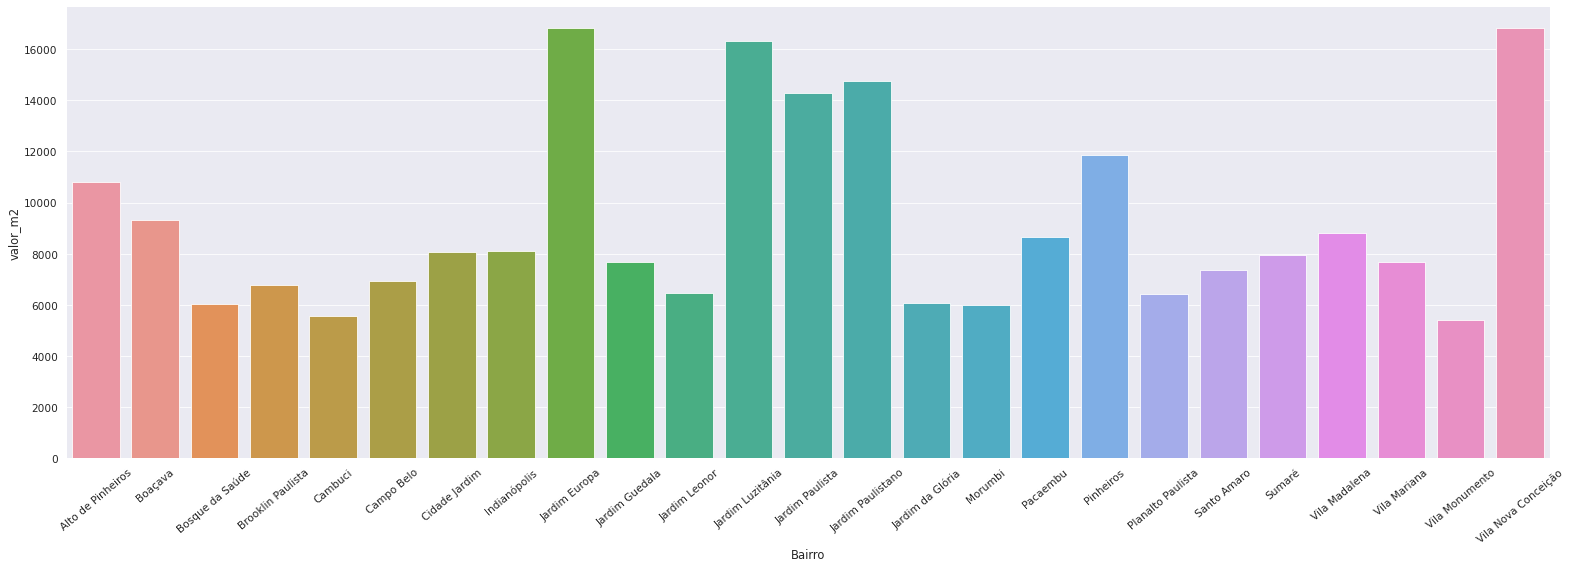

In [29]:
plt.figure(figsize = (22,8))
ax = sns.barplot(data = metragem_valor.query('Bairro in @bairros'), x = 'Bairro', y = 'valor_m2')
ax.tick_params(axis = 'x', rotation = 40)
plt.tight_layout()

In [30]:
# Visualizando a metragem e o valor dos imóveis correspondentes as seguintes variáveis: Quartos, banheiros e vagas

# 1 - Quartos
data_por_quartos = data_vendas_filtrado.groupby('Quartos').mean()
data_por_quartos.reset_index(inplace = True)
data_por_quartos

,Quartos,Metragem,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel
0,1,153.66,1.59,1.86,1012728.67,1.01,7438.36
1,2,150.21,2.02,2.18,954146.21,0.95,6241.60
2,3,251.29,3.22,3.29,1912036.66,1.91,7386.84
3,4,432.30,4.55,4.56,3614017.37,3.61,8356.01
4,5,554.85,5.50,5.31,4413583.81,4.41,7922.57
5,6,527.78,5.12,4.76,4027480.77,4.03,7277.89


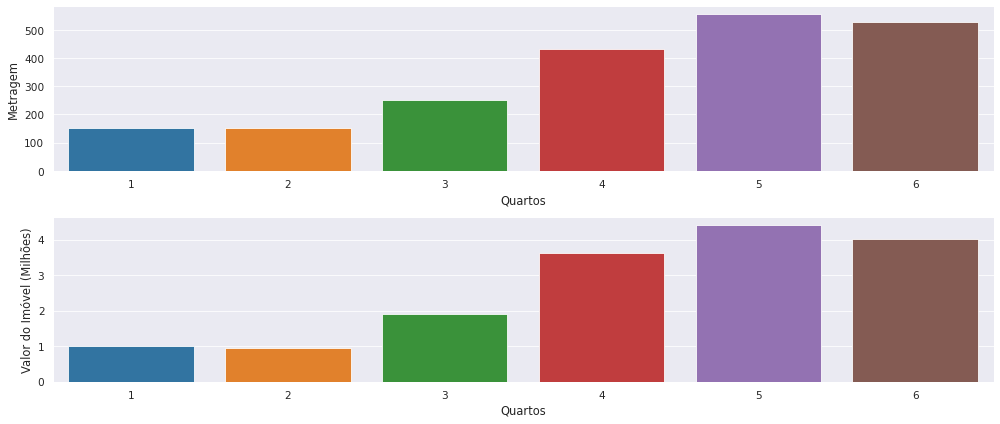

In [31]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_quartos, x = 'Quartos', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_quartos, x = 'Quartos', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

In [32]:
# 2 - Banheiros
data_por_banheiros = data_vendas_filtrado.groupby('Banheiros').mean()
data_por_banheiros.reset_index(inplace = True)
data_por_banheiros

,Banheiros,Metragem,Quartos,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel
0,1,195.48,2.62,2.73,1188401.35,1.19,5886.64
1,2,193.73,2.84,2.67,1303183.29,1.30,6843.13
2,3,251.81,3.20,3.21,1871674.37,1.87,7276.61
3,4,323.38,3.50,3.88,2570289.89,2.57,7882.84
4,5,409.40,3.71,4.34,3436765.14,3.44,8453.60
5,6,502.42,4.05,5.05,4367245.14,4.37,8746.32
6,7,588.84,4.35,5.56,5074910.83,5.07,8859.22
7,8,698.35,4.36,6.33,5975517.86,5.98,8798.02
8,9,725.11,4.69,6.33,6452000.00,6.45,8838.74


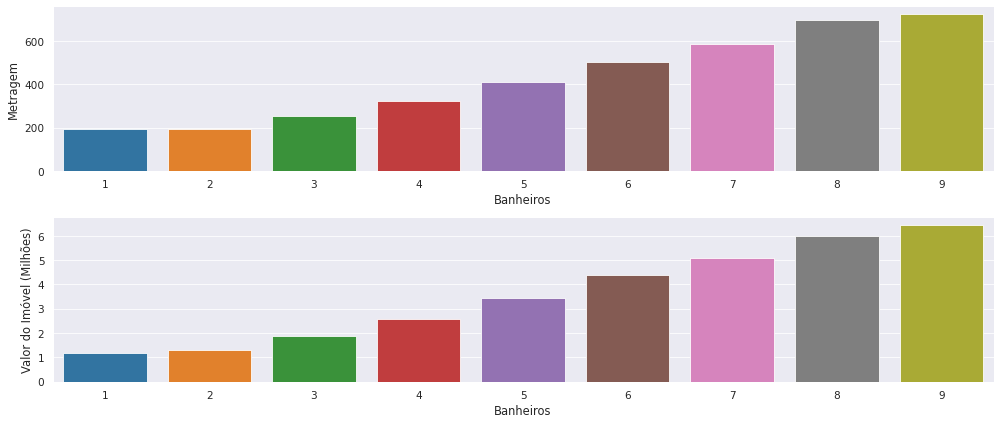

In [33]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_banheiros, x = 'Banheiros', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_banheiros, x = 'Banheiros', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

In [34]:
# 3 - Vagas
data_por_vagas = data_vendas_filtrado.groupby('Vagas').mean()
data_por_vagas.reset_index(inplace = True)
data_por_vagas

,Vagas,Metragem,Quartos,Banheiros,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel
0,1,145.78,2.52,2.10,936091.37,0.94,6490.11
1,2,188.72,2.94,2.77,1294693.64,1.29,6806.80
2,3,283.36,3.34,3.61,2280744.57,2.28,7709.91
3,4,368.51,3.63,4.23,3120221.79,3.12,8310.35
4,5,393.80,3.70,4.13,3283274.98,3.28,8108.02
5,6,483.62,3.81,4.66,3820797.38,3.82,7860.17
6,7,507.53,4.03,4.65,4078979.03,4.08,7881.10
7,8,560.23,3.97,5.07,4654340.88,4.65,8253.97
8,9,734.00,4.15,5.38,6547264.71,6.55,9049.92
9,10,723.94,4.07,5.31,5132862.03,5.13,7840.84


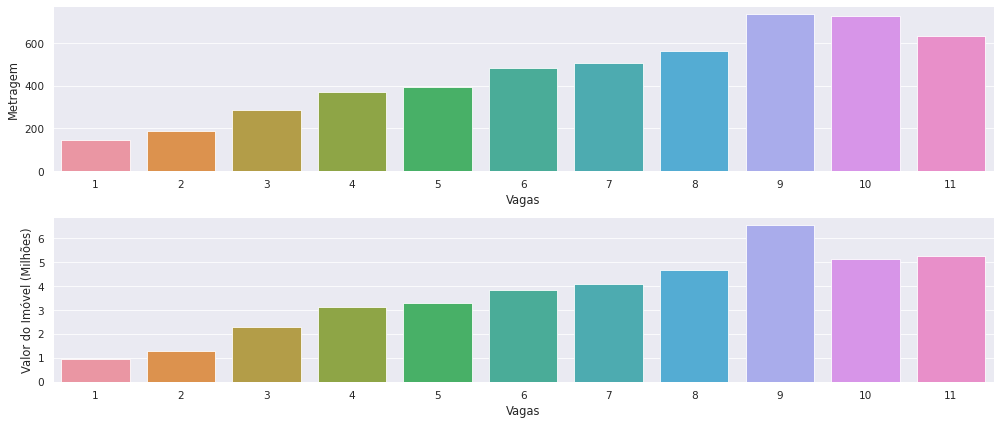

In [35]:
fig, ax = plt.subplots(2, figsize = (14, 6))
sns.barplot(data = data_por_vagas, x = 'Vagas', y = 'Metragem', ax = ax[0])
sns.barplot(data = data_por_vagas, x = 'Vagas', y = 'Valor_anuncio_milhoes', ax = ax[1])
ax[1].set(ylabel = 'Valor do Imóvel (Milhões)')
plt.tight_layout()

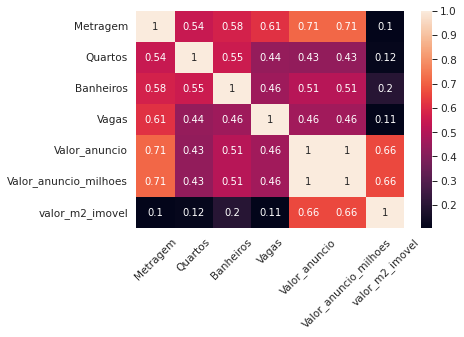

In [36]:
# Análise de correlação com o gráfico heatmap
ax = sns.heatmap(data_vendas_filtrado.corr(), annot= True)
ax.tick_params(axis = 'x', rotation = 45)

* Analisando os gráficos relacionando a metragem e o valor dos imóveis com os números de quartos, vagas e banheiros é possível perceber uma correlação de proporcionalidade, relembrando que essa análise foi realizada com os dados sem os valores outliers. Ou seja quanto maior o número de quartos e banheiros maior a metragem e o valor do imóvel, como é de se esperar; fugindo um pouco da regra, se tratando do número de vagas é possível observar um pico nos valores de metragem e valor do imóvel com o número de vagas igual a 9 e uma redução nos valores seguintes.

In [37]:
# Dataset final > data_vendas_filtrado
data_vendas_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua,Valor_anuncio_milhoes,valor_m2_imovel
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,avenida itacira,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,NaN,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,rua tobias barreto,0.54,5400.00


### **3.Dados IBGE**

#### **Descrição das variáveis:**

- V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes;
- V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes;
- V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1);
- V004: Variância do número de moradores em domicílios particulares permanentes;
- V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento);
- V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento);
- V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento);
- V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento);
- V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento);
- V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento);
- V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento);
- V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento);

**Fonte:** https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html <br>
**Caminho:** Censos > Conse_Demografico_2010 > Resultados_do_universo > Agregados_por_Setores_Censitarios > SP_Capital_20190823.zip <br>
**Arquivo:** Basico_SP1.csv


In [38]:
# Importação dos dados do IBGE
path = 'datasets/Basico_SP1.csv'
data_ibge = pd.read_csv(path, encoding = 'ISO-8859-1', sep = ';', thousands = '.', decimal =',')
data_ibge.dropna(how = 'all', axis = 1, inplace = True)
data_ibge.head()

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [39]:
# Analisando os valores únicos da colunas string
cols = ['Cod_Grandes Regiões', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor']

for col in cols:
    print(f'{col}: {data_ibge[col].unique()}')

Cod_Grandes Regiões: [3]
Nome_Grande_Regiao: ['Região Sudeste']
Cod_UF: [35]
Nome_da_UF : ['São Paulo']
Cod_meso: [3515]
Nome_da_meso: ['Metropolitana de São Paulo']
Cod_micro: [35061]
Nome_da_micro: ['São Paulo']
Cod_RM: [20]
Nome_da_RM: ['RM São Paulo']
Cod_municipio: [3550308]
Nome_do_municipio: ['SÃO PAULO']
Cod_bairro: [3550308000]
Nome_do_bairro: ['SÃO PAULO (todos os setores)']
Situacao_setor: [1 8 2 4 3 7]
Tipo_setor: [0 1 3 7 6 2]


* É possível verificar que todos os dados são referentes a grande região Sudeste, micro e meso região de São Paulo e consequentemente possuem os mesmos códigos. Dessa forma podemos começar removendo essas colunas por não apresentarem informações relevantes a análise e integração com os dados dos imóveis.

In [40]:
cols_to_drop = ['Cod_Grandes Regiões', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_bairro', 'Nome_do_bairro']

data_ibge = data_ibge.drop(columns = cols_to_drop, axis = 1)
data_ibge.head()

,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [41]:
# Verificando se as variáveis Nome_do_distrito e Nome_do_subdistrito possuem valores iguais. Caso sejam iguais podemos remover uma delas.
data_ibge['Nome_do_distrito'].equals(data_ibge['Nome_do_subdistrito'])

True

In [42]:
data_ibge.drop(columns = 'Nome_do_subdistrito', axis = 1, inplace = True)
data_ibge.head()

,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,355030801,ÁGUA RASA,35503080100,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,355030801,ÁGUA RASA,35503080100,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,355030801,ÁGUA RASA,35503080100,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,355030801,ÁGUA RASA,35503080100,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,355030801,ÁGUA RASA,35503080100,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [43]:
# Base de dados da API Cep Aberto - detalhar formas de conseguir os dados
path = 'datasets/enderecos.csv'
enderecos = pd.read_csv(path)
enderecos.head()

/tmp/ipykernel_39641/979462360.py:3: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [44]:
# Filtrar o dataset endereco pelo município de São Paulo
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


In [45]:
# Criando uma nova coluna referente ao nome da rua, onde juntaremos a coluna 'tipo_logr' + 'logr_nome'
enderecos_sp['rua'] = enderecos_sp['tipo_logr'] + ' ' + enderecos_sp['logr_nome']
enderecos_sp['rua'] = enderecos_sp['rua'].str.lower().str.strip()  # padronizando o nome das ruas para letras minúsculas e sem espaços nas extremidades
enderecos_sp.head()

/tmp/ipykernel_39641/1315187238.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_39641/1315187238.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


* Agora iremos extrair os valores de 'rua', 'Cep', 'latitude' e 'longitude' do dataset enderecos_sp e juntar ao dataset data_vendas_filtrado por meio da função `query` do pandas. Onde esses valores irão auxiliar na combinação entre o dataset de vendas e o dataset do IBGE.

In [46]:
# Atualizando o dataset data_vendas_filtrado com as informações do dataset enderecos_sp refentes a Rua, Cep, latitude e longitude
data_geo = pd.merge(left = data_vendas_filtrado, right = enderecos_sp[['rua', 'cep', 'latitude', 'longitude']],
                    how = 'left', left_on = 'apenas_rua', right_on = 'rua').drop_duplicates(subset = data_vendas_filtrado.columns, keep = 'first').query('cep > 0')
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua,Valor_anuncio_milhoes,valor_m2_imovel,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,avenida itacira,7.00,7000.00,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez,3.70,7459.68,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez,0.38,3040.00,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,NaN,0.69,2209.68,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,rua tobias barreto,0.54,5400.00,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82913,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,rua pedro teixeira,0.96,6114.65,rua pedro teixeira,4550010.00,-23.60,-46.68
82914,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,avenida odila,1.50,5617.98,avenida odila,4058020.00,-23.61,-46.65
82916,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,rua tapuçu,0.67,7000.00,rua tapuçu,4671185.00,-23.66,-46.69
82917,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,rua estero belaco,1.05,5121.95,rua estero belaco,4145020.00,-23.62,-46.63


* **Dados Georeferênciados da base IBGE**

**Fonte:** https://www.ibge.gov.br/geociencias/downloads-geociencias.html <br>
**Caminho:** organizacao_do_territorio > malhas_territorias > malhas_setores_censitarios__divisoes_intramunicipais > censo_2010 > setores_censitarios_shp > sp > sp_setores_censitarios.zip <br>
**Arquivo:** 35SEE250GC_SIR.shp (Formato Shapefile)

In [47]:
# Como o arquivo extraido da base IBGE se trata de um shapefile precisaremos de uma biblioteca espécifica para realizar a leitura do dataset, o geopandas.
import geopandas as gpd

path = 'datasets/sp_setores_censitarios/35SEE250GC_SIR.shp'
setor_censo = gpd.read_file(path)
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [48]:
# Filtrando o dataset pelo município de São Paulo
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO']
setor_censo_sp.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
42322,109347.00,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5..."
42323,109348.00,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."
42324,109349.00,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5..."
42325,109350.00,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42326,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5..."
42326,109351.00,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42327,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5..."


* Recapitulando, queremos identificar o código do setor censitário para cada imóvel da nossa base de dados de vendas e assim associar ao banco de dados do IBGE. Para isso será utilizando a função `.contains()` e `.Points(long, lat)` para verificar a qual setor cada imóvel pertence.

In [49]:
# Necessário import a função Point para realizar a verificação dentro dos limites dos poligonos
from shapely.geometry import Point

#  Criando uma coluna contendo as informaões de latitude e longitude
data_geo['Point'] = ''
for i in data_geo.index:
    data_geo['Point'][i] = Point(data_geo['longitude'][i], data_geo['latitude'][i])

# Identificando o código do setor censitário de acordo com a presença da informações geográfica (lat, long) dentro do polígonos (geometry) de cada setor censitário
data_geo['setor_censo'] = data_geo['Point'].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]

data_geo

/tmp/ipykernel_39641/3737752433.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua,Valor_anuncio_milhoes,valor_m2_imovel,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,avenida itacira,7.00,7000.00,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez,3.70,7459.68,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez,0.38,3040.00,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,NaN,0.69,2209.68,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,rua tobias barreto,0.54,5400.00,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82913,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,rua pedro teixeira,0.96,6114.65,rua pedro teixeira,4550010.00,-23.60,-46.68,POINT (-46.6783021 -23.6035167),355030835000027
82914,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,avenida odila,1.50,5617.98,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
82916,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,rua tapuçu,0.67,7000.00,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
82917,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,rua estero belaco,1.05,5121.95,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


In [50]:
# Como essa etapa da análise exige um tempo considerável de processamento iremos exportar o dataset para que não seja necessário repetir esse processo
# data_geo.to_csv(r'datasets/data_geo.csv', index = False)

In [51]:
# Para que possamos realizar a combinação das bases de dados é necessário que a coluna de referência (código do setor censitário) estejam com o memso tipo de dado
data_geo.dropna(subset = ['setor_censo'], inplace  = True)
data_geo['setor_censo'] = data_geo['setor_censo'].astype('int')

In [52]:
# Combinando a base de dados das vendas com a base de dados do IBGE utilizando a coluna o código do setor censitário
data_vendas_censo = pd.merge(left = data_geo[data_geo['setor_censo'].notnull()], right = data_ibge, how = 'left', left_on= 'setor_censo', right_on= 'Cod_setor')
data_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,apenas_rua,Valor_anuncio_milhoes,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,rua aurelia perez alvarez,3.70,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
1,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,rua alba valdez,0.38,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
2,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,rua graham bell,1.98,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
3,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.00,rua francisco paulo,0.85,...,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
4,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.00,rua guilherme valente,0.45,...,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,rua pedro teixeira,0.96,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
3792,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,avenida odila,1.50,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
3793,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,rua tapuçu,0.67,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
3794,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,rua estero belaco,1.05,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [53]:
# Reduzindo o banco de dados removendo colunas que não serão utilizadas
cols_to_drop = ['Cod_setor', 'Cod_distrito',
       'Cod_subdistrito']
data_vendas_censo.drop(columns = cols_to_drop, inplace= True)

In [54]:
# Verificano se as colunas referentes apenas as ruas são iguais, caso sejam podemos remover uma evitando colunas duplicadas
print(data_vendas_censo['apenas_rua'].equals(data_vendas_censo['rua']))
data_vendas_censo.drop(columns = 'apenas_rua', inplace= True)

True


In [55]:
# Como não existe nenhuma informção a respeito da coluna 'Tipo_setor' ela será removida
data_vendas_censo.drop(columns = 'Tipo_setor', inplace= True)

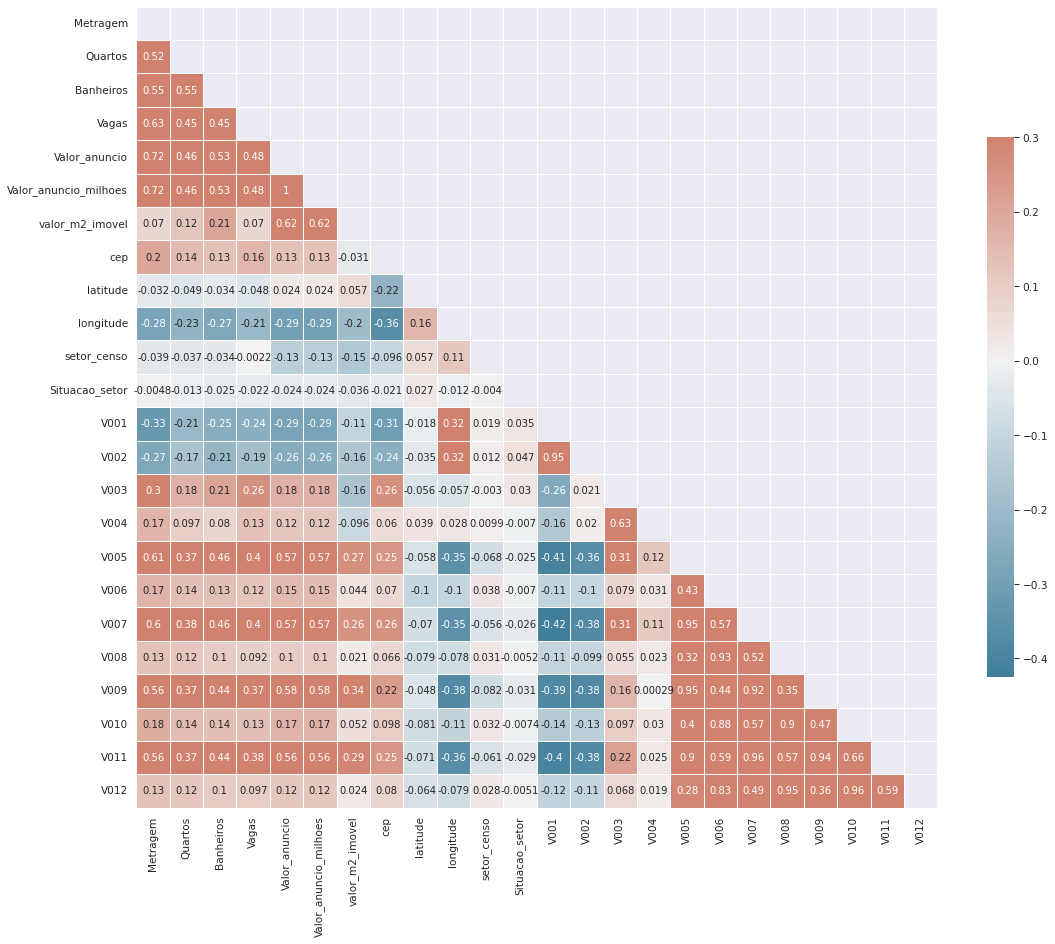

In [56]:
# Analisando as correlacões por meio do heatmap
# Gerando a matrix de correlação
corr = data_vendas_censo.corr()

# Gerando a márcara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype= bool))

fig, axes = plt.subplots(figsize = (16,16))
cmap = sns.diverging_palette(230, 20, as_cmap= True)
sns.heatmap(corr, mask= mask,annot= True, cmap= cmap, vmax= .3, center = 0,
        square= True, linewidths= .5, cbar_kws= {'shrink': .5})

plt.tight_layout()

* No gráfico acima é possível perceber uma correlação relativamente maior entre as variáveis referentes a renda extraídas do banco de dados do IBGE (V011, V009, V007 e V005) com as variáveis referentes as caractéristicas físicas dos imóveis, confirmando a relação entre a estrutura do imóvel e a renda local da população.

* Assim como também parece existir uma correlação negativa entre as variáveis referentes a renda e a longitude.

In [57]:
# Avaliando algumas caracteristicas relacionadas a Situação do Setor
avaliacao_setor = data_vendas_censo.groupby('Situacao_setor').mean()
avaliacao_setor.reset_index(inplace = True)
avaliacao_setor.head()

,Situacao_setor,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel,cep,latitude,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,1.00,307.41,3.32,3.59,3.63,2222883.74,2.22,7033.13,4355625.12,-23.58,...,3.03,2.11,5763.20,197477055.29,6688.22,272481798.36,3157.23,113509752.10,4733.89,202249642.17
1,2.00,403.50,2.50,2.50,4.50,1450000.00,1.45,4022.14,4951025.00,-23.55,...,3.73,2.19,2891.69,9913402.88,3199.56,9813665.28,1596.27,5946301.25,2387.06,6924615.63
2,3.00,201.67,3.33,3.33,2.00,866666.67,0.87,4292.68,4870083.67,-23.75,...,3.07,1.74,2528.74,5332360.64,2637.74,5274446.72,1536.38,3730969.07,2126.24,3909607.98
3,8.00,275.50,3.00,2.00,2.00,690000.00,0.69,2504.74,2630040.00,-23.46,...,3.35,2.05,1654.80,4927212.67,1793.59,5092061.72,955.12,2428657.82,1424.13,2954091.08


<AxesSubplot:xlabel='Situacao_setor', ylabel='V005'>

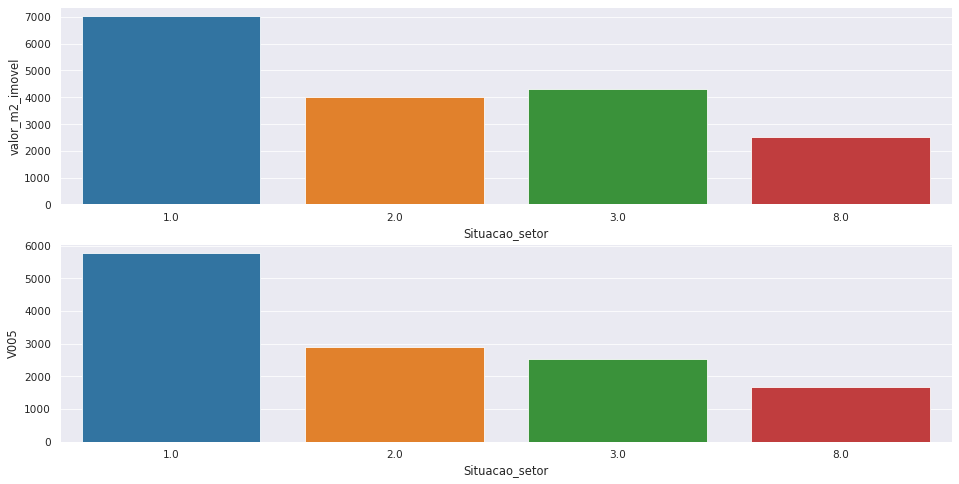

In [58]:
fig, axes = plt.subplots(2, figsize = (16,8))
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'valor_m2_imovel', ax = axes[0])
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'V005', ax = axes[1])

* Avaliando o gráfico acima é possível perceber que a Situação do Setor tem um grande impacto no valor do metro quadrado como também na variável 'V005' que representa valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes. Assim, a variável 'Situacao_setor' é uma potencial feature para a criação do modelo.

<AxesSubplot:xlabel='Situacao_setor', ylabel='Vagas'>

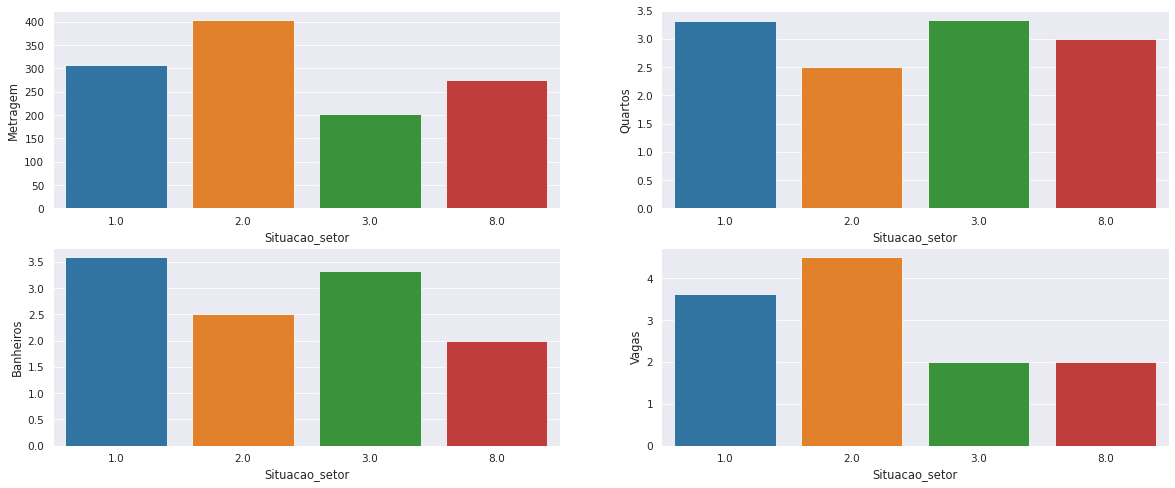

In [59]:
fig, axes = plt.subplots(2,2, figsize = (20,8))
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'Metragem', ax = axes[0,0])
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'Quartos', ax = axes[0,1])
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'Banheiros', ax = axes[1,0])
sns.barplot(data = avaliacao_setor, x = 'Situacao_setor', y = 'Vagas', ax = axes[1,1])

- **Visualização espacial das variáveis referentes a renda mensal (V005) e o valor do m2 no Estado de São Paulo**

In [60]:
# Criando um geodataframe apatir do dataframe com as coordenadas
geo_dataframe = gpd.GeoDataFrame(data_vendas_censo, geometry= gpd.points_from_xy(data_vendas_censo.longitude, data_vendas_censo.latitude))
geo_dataframe.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,POINT (-46.68831 -23.64096)
1,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,POINT (-46.69589 -23.75299)
2,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,POINT (-46.76008 -23.59380)
3,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.00,0.85,5862.07,...,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75,POINT (-46.51645 -23.52225)
4,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.00,0.45,3000.00,...,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36,POINT (-46.73394 -23.66473)


**Arquivo shapefile dos municípios de São Paulo:**

* Fonte: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15774-malhas.html?=&t=downloads <br>
* Caminho: municipio_2021 > UFs > SP > SP_Municipios_2021 <br>
* Arquivo: SP_Municipios_2021.shp

In [61]:
# Basemap Estado de São Paulo
base_map = gpd.read_file('datasets/SP_Municipios_2021/SP_Municipios_2021.shp')
base_map.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.99,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.06,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.55,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.67,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.13,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


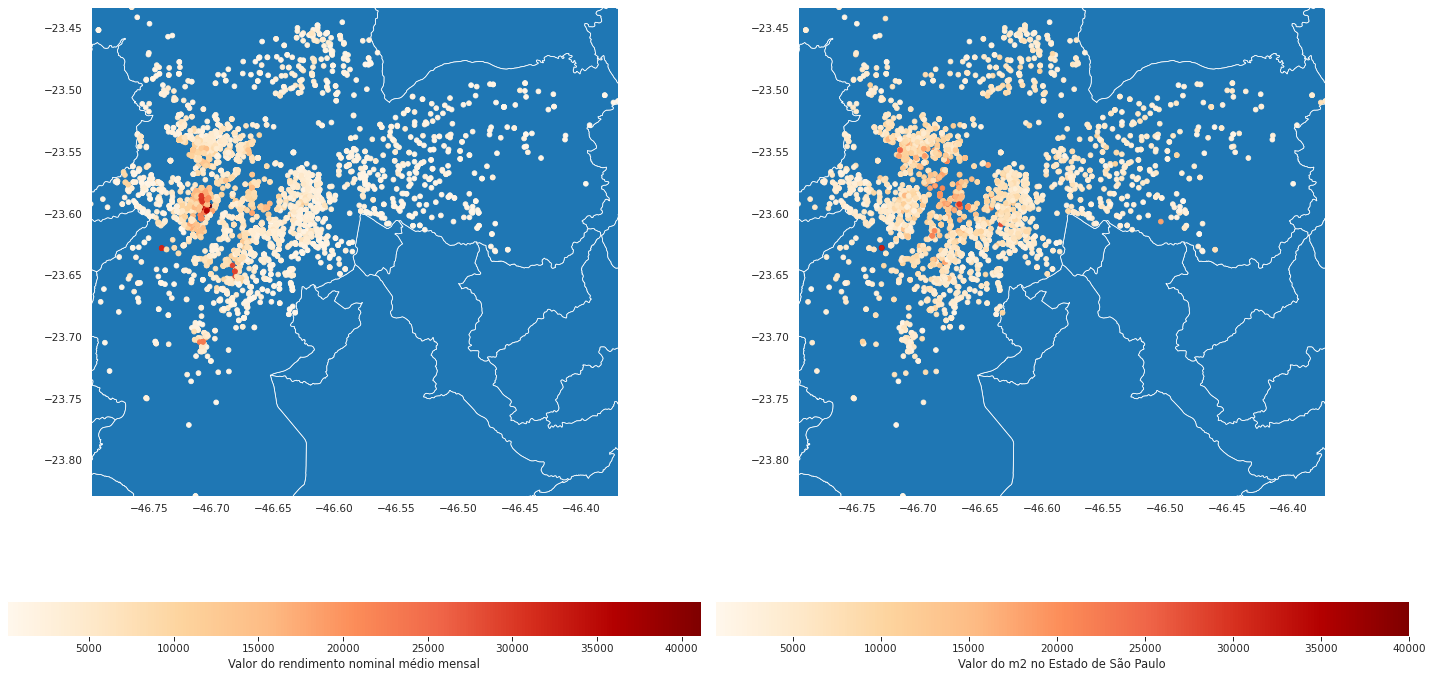

In [62]:
fig, axes = plt.subplots(1,2, figsize = (20,10))
base_map.plot(ax = axes[0])
geo_dataframe.plot(column = 'V005', ax = axes[0], legend= True, cmap='OrRd',
        legend_kwds={'label': "Valor do rendimento nominal médio mensal",
                        'orientation': "horizontal"})
minx, miny, maxx, maxy = geo_dataframe.total_bounds
axes[0].set_xlim(minx, maxx)
axes[0].set_ylim(miny, maxy)

base_map.plot(ax = axes[1])
geo_dataframe.plot(column = 'valor_m2_imovel', ax = axes[1], legend= True, cmap='OrRd',
        legend_kwds={'label': "Valor do m2 no Estado de São Paulo",
                        'orientation': "horizontal"})
minx, miny, maxx, maxy = geo_dataframe.total_bounds
axes[1].set_xlim(minx, maxx)
axes[1].set_ylim(miny, maxy)

plt.tight_layout()

* Avaliando de forma espacial é possível perceber as posições coincidentes entre os valores do redimento mensal e os valores do m2 no Estado de São Paulo.

In [63]:
# Dataset final > data_vendas_censo
data_vendas_censo.dropna(inplace = True)
data_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_milhoes,valor_m2_imovel,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,POINT (-46.68831 -23.64096)
1,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,POINT (-46.69589 -23.75299)
2,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,POINT (-46.76008 -23.59380)
3,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,850000.00,0.85,5862.07,...,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75,POINT (-46.51645 -23.52225)
4,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,450000.00,0.45,3000.00,...,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36,POINT (-46.73394 -23.66473)


### **4.Construção e Teste dos Modelos de Predição**

In [64]:
# Libraries

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Set data inputs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
# Transformando os dados para o treinamento do modelo
def set_input_data(X, y):

    # Separando os dados em treino e test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Normalizando os dados
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [66]:
# Construção do modelo de regressão
def model_linear_regression(X_train, y_train):

    # Construcao da variável com o modelo
    linear_reg = LinearRegression()

    # Treino do modelo
    linear_reg.fit(X_train, y_train)

    return linear_reg

In [67]:
def metrics_avaliation(y_test, y_pred):
    '''
    R2: R2 Score
    MAR: Mean Absolute Error
    MSE: Mean Squared Error
    '''

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'R2: {r2:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')

**Modelo 1: Baseline - Regressão Linear**

In [68]:
# Modelo 1: Baseline - Regressão Linear
X = data_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]
y = data_vendas_censo['Valor_anuncio']

X_train, X_test, y_train, y_test = set_input_data(X,y)

model_1 = model_linear_regression(X_train, y_train)

y_pred = model_1.predict(X_test)

In [69]:
# Avaliando o modelo
metrics_avaliation(y_test, y_pred)

R2: 0.46
MAE: 877941.23
MSE: 2231643833162.80


Text(0, 0.5, 'Valor Anuncio Predito')

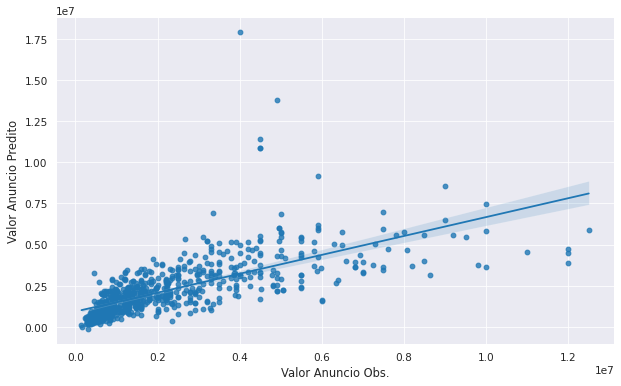

In [70]:
# Visualizando a predição x valores observados
plt.figure(figsize = (10,6))
ax = sns.regplot(x = y_test, y = y_pred)
ax.set_xlabel('Valor Anuncio Obs.')
ax.set_ylabel('Valor Anuncio Predito')

**Modelo 2: Variáveis de renda e posição geográfica incoporadas ao modelo - Regressão Linear**

* Nesse modelo serão adicionadas as variáveis referentes a rede que apresentaram uma maior de valor de correlação, vistos na matrix de correlação na seção EDA;
* Como também as informações geográficas.

In [71]:
# Modelo 2: Variáveis referenes a renda - Regressão Linear
X = data_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas',
                    'latitude', 'longitude', 'Situacao_setor', 'V005', 'V007', 'V009', 'V011']]
y = data_vendas_censo['Valor_anuncio']

X_train, X_test, y_train, y_test = set_input_data(X,y)

model_2 = model_linear_regression(X_train, y_train)

y_pred = model_2.predict(X_test)

In [72]:
# Avaliando o modelo
metrics_avaliation(y_test, y_pred)

R2: 0.53
MAE: 803031.70
MSE: 1956154704478.23


Text(0, 0.5, 'Valor Anuncio Predito')

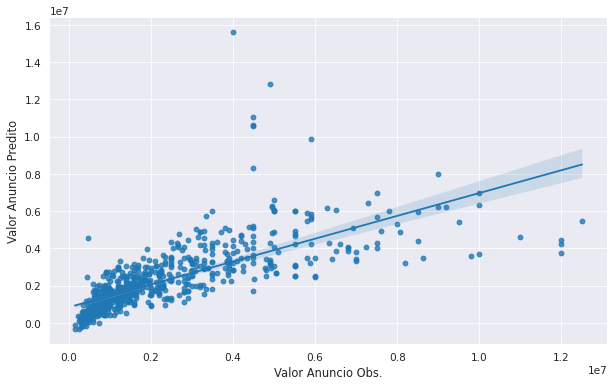

In [73]:
# Visualizando a predição x valores observados
plt.figure(figsize = (10,6))
ax = sns.regplot(x = y_test, y = y_pred)
ax.set_xlabel('Valor Anuncio Obs.')
ax.set_ylabel('Valor Anuncio Predito')

**Modelo 3: Variáveis de renda e posição geográfica incoporadas ao modelo - Random Forest**

* Nesse modelo serão adicionadas as variáveis referentes a rede que apresentaram uma maior de valor de correlação, vistos na matrix de correlação na seção EDA;
* Como também as informações geográficas.

In [74]:
# Modelo 3: Variáveis referenes a renda - Random Forest
X = data_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas',
                    'latitude', 'longitude', 'Situacao_setor', 'V005', 'V007', 'V009', 'V011']]
y = data_vendas_censo['Valor_anuncio']

X_train, X_test, y_train, y_test = set_input_data(X,y)

In [75]:
# Grid of differents hyperparameters
grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(start = 1, stop= 10, num = 5)],
    'random_state': [123]
}


# Set the model into a variabel
random_forest = RandomForestRegressor()

model_random = RandomizedSearchCV(estimator = random_forest, param_distributions = grid, n_iter = 100,
                                    cv = 3, verbose = 1, random_state = 123)

model_random.fit(X_train, y_train)

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRe

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=1, max_features=auto, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=1, max_features=auto, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=1, max_features=auto, n_estimators=100, random_state=123; total time=   0.1s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=325, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=325, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=325, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=550, random_state=123; total time=   0.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=550, random_state=123; total time=   0.9s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=550, random_state=123; total time=   0.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=775, random_state=123; total time=   1.1s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=775, random_state=123; total time=   1.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=775, random_state=123; total time=   1.2s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=1000, random_state=123; total time=   1.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=1000, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=1, max_features=auto, n_estimators=1000, random_state=123; total time=   1.5s
[CV] END max_depth=1, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.6s
[CV] END max_depth=1, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=100, random_state=123; total time=   0.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=100, random_state=123; total time=   0.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=100, random_state=123; total time=   0.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=325, random_state=123; total time=   0.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=325, random_state=123; total time=   0.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=325, random_state=123; total time=   0.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=550, random_state=123; total time=   1.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=550, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=550, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=775, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=775, random_state=123; total time=   2.1s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=775, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=1000, random_state=123; total time=   2.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=1000, random_state=123; total time=   2.7s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=3, max_features=auto, n_estimators=1000, random_state=123; total time=   2.6s
[CV] END max_depth=3, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.8s
[CV] END max_depth=3, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.7s
[CV] END max_depth=3, max_features=sqrt

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=100, random_state=123; total time=   0.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=100, random_state=123; total time=   0.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=100, random_state=123; total time=   0.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=325, random_state=123; total time=   1.1s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=325, random_state=123; total time=   1.2s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=325, random_state=123; total time=   1.2s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=550, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=550, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=550, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=775, random_state=123; total time=   2.9s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=775, random_state=123; total time=   3.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=775, random_state=123; total time=   2.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=1000, random_state=123; total time=   3.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=1000, random_state=123; total time=   3.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=5, max_features=auto, n_estimators=1000, random_state=123; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, n_estimators=550, random_state=123; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=100, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=100, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=100, random_state=123; total time=   0.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=325, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=325, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=325, random_state=123; total time=   1.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=550, random_state=123; total time=   2.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=550, random_state=123; total time=   2.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=550, random_state=123; total time=   2.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=775, random_state=123; total time=   3.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=775, random_state=123; total time=   3.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=775, random_state=123; total time=   3.5s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=1000, random_state=123; total time=   4.4s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=1000, random_state=123; total time=   4.9s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=7, max_features=auto, n_estimators=1000, random_state=123; total time=   4.5s
[CV] END max_depth=7, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.6s
[CV] END max_depth=7, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.6s
[CV] END max_depth=7, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.6s
[CV] END max_depth=7, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.0s
[CV] END max_depth=7, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.1s
[CV] END max_depth=7, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.1s
[CV] END max_depth=7, max_features=sqrt

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=100, random_state=123; total time=   0.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=100, random_state=123; total time=   0.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=100, random_state=123; total time=   0.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=325, random_state=123; total time=   1.8s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=325, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=325, random_state=123; total time=   2.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=550, random_state=123; total time=   3.3s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=550, random_state=123; total time=   3.2s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=550, random_state=123; total time=   3.2s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=775, random_state=123; total time=   4.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=775, random_state=123; total time=   4.9s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=775, random_state=123; total time=   4.6s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=1000, random_state=123; total time=   6.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=1000, random_state=123; total time=   6.0s


/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



[CV] END max_depth=10, max_features=auto, n_estimators=1000, random_state=123; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, n_estimators=100, random_state=123; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, n_estimators=325, random_state=123; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, n_estimators=550, random_state=123; total time=   1.3s
[CV] END max_depth=10, max_fe

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000],
                                        'random_state': [123]},
                   random_state=123, verbose=2)

In [76]:
model_random.best_params_

{'random_state': 123,
 'n_estimators': 775,
 'max_features': 'auto',
 'max_depth': 10}

In [77]:
# Create a Random Forest model with the best params
model_3 = RandomForestRegressor(n_estimators = 775, max_features = 'auto', max_depth = 10, random_state = 123)
model_3.fit(X_train, y_train)

/home/lukasveiga/.cache/activestate/029c7316/usr/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=775,
                      random_state=123)

In [78]:
y_pred = model_3.predict(X_test)

In [79]:
# Avaliando o modelo
metrics_avaliation(y_test, y_pred)

R2: 0.87
MAE: 443794.53
MSE: 548306494444.22


Text(0.5, 1.0, 'Random Forest Regression')

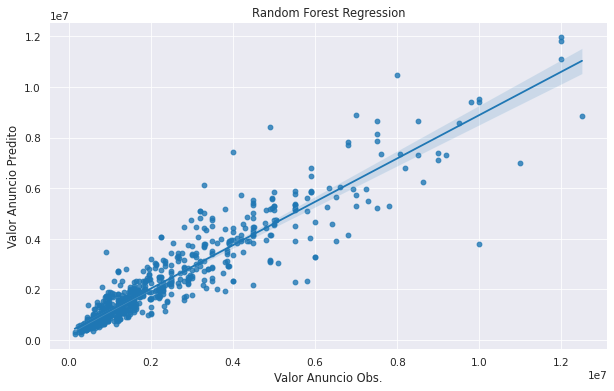

In [81]:
# Visualizando a predição x valores observados
plt.figure(figsize = (10,6))
ax = sns.regplot(x = y_test, y = y_pred)
ax.set_xlabel('Valor Anuncio Obs.')
ax.set_ylabel('Valor Anuncio Predito')
ax.set_title('Random Forest Regression')

**Avalição dos Modelos de Regressão:**

Modelo 3: Random Forest

Hyperparameters:

> random_state: 123, <br>
> n_estimators: 775, <br>
> max_features: 'auto', <br>
> max_depth: 10 <br>

Metrics:

> R2: 0.87 <br>
> MAE: 443794.53 <br>
> MSE: 548306494444.22 <br>